In [26]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

import numpy as np
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener

import json
import sys
#import langid
import re

import emoji
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [30]:
consumer_key = 'OrBHhvBsTwtzKPIOJ0XFjCCLw'
consumer_secret = 'aoisrrqSka7ZirLjjwM5A4y0y4ZySuA62C782WSpEBANLKN603'
access_token = '996280787971391489-n3wdQOJe6SflAqDbutSlhRQi7FoDfjU'
access_secret = 'q17dGaIzpLj3FLQeE10dqSpJa7LN0z2RpR0bPtZOEY556'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# this function ensures the tweets contain emoji, which applied in the latter phase of collecting data
def contain_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               "]+", flags=re.UNICODE)
    try:
        emj = re.findall(emoji_pattern, text)
        #emj = re.findall(emoji.get_emoji_regexp(),text.decode('unicode-escape'))
        return len(emj)>0
    except:
        return(False)

# do not want retweet
def analyze_status(text):
    if 'RT' in text[0:3]:
        return(True)
    else:
        return(False)


# get the data
class MyStreamListener(StreamListener):
    tweet_number = 0
    def on_status(self, status):
        #if contain_emoji(status.text) and 'sex' not in status.text and 'Sex' not in status.text and not analyze_status(status.text):
        if 'sex' not in status.text and 'Sex' not in status.text and not analyze_status(status.text):
            #with open('tweets.txt','a') as tf:
            with open('ass5.txt','a') as tf:
                tf.write(str(status.text))
                #print(status.text)
                self.tweet_number += 1
                print(self.tweet_number)
        else:
            pass
        
        if self.tweet_number>=2000:
            sys.exit(1)
    def on_error(self, status):
        print("Error Code : " + status)


 # only want tweets have these hashtags
hashlist = [ '#ador', '#fond', '#like', '#attract', '#care', '#tender', '#compass',
                      '#sentiment', '#desir', '#passion', '#infatu', '#long', '#amus', '#bliss',
                      '#gaieti', '#glee', '#jolli', '#jovial', '#joy', '#delight', '#enjoy', '#glad',
                      '#happi', '#jubil', '#elat', '#satisfact', '#ecstasi', '#euphoria', '#enthusiasm',
                      '#zeal', '#excit', '#thrill', '#exhilar', '#pleasur', '#triumph', '#eager',
                      '#hope', '#enthral', '#raptur', '#relief', '#amaz', '#astonish', '#aggrav',
                      '#agit', '#annoy', '#grouchi', '#grumpi', '#crosspatch', '#frustrat', '#anger',
                      '#outrag', '#furi', '#wrath', '#hostil', '#feroc', '#bitter', '#hatr', '#scorn',
                      '#spite', '#veng', '#dislik', '#resent', '#revuls', '#contempt', '#loath',
                      '#jealousi', '#torment', '#agoni', '#anguish', '#hurt', '#depress', '#despair',
                      '#gloom', '#glum', '#unhappi', '#grief', '#sorrow', '#woe', '#miseri',
                      '#melancholi', '#dismay', '#displeasur', '#guilt', '#regret', '#remors',
                      '#alien', '#defeat', '#deject', '#embarrass', '#homesick', '#humili', '#insecur',
                      '#insult', '#isol', '#loneli', '#reject', '#piti', '#mononoawar', '#sympathi',
                      '#alarm', '#shock', '#fear', '#fright', '#horror', '#terror', '#panic', '#hysteria',
                      '#mortif', '#anxieti', '#suspens', '#uneasi', '#apprehens', '#worri', '#distress',
                      '#dread', '#love', '#good', '#lol', '#lmao', '#awesome', '#family', '#hot',
                      '#sexy', '#lust', '#happy', '#smile', '#gleeful', '#grateful', '#blessed',
                      '#comfortable', '#appreciative', '#motivation', '#hopeful', '#spirited', '#wow',
                      '#woah', '#grumpy', '#badmood', '#annoyed', '#anger', '#irate', '#jealous',
                      '#destroyed', '#wrecked', '#fml', '#sad', '#depressed', '#smh', '#damnshame',
                      '#awful', '#scary', '#spooky', '#nerves', '#stress', '#stressed', '#anxious']

hashlist = ['#TikTok', '#tiktok', 'TikTok', 'tiktok', 'TIKTOK'] 


myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener , tweet_mode='extended')


myStream.filter(languages=['en'],track=hashlist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


SystemExit: 1

/Users/zihe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [29]:
myStream

In [2]:
tweets = []
with open("tweets.txt") as f:
    # read each line
    flines = f.readlines()
    for line in flines:
        #tweets.append({"text":line})
        tweets.append(line)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

limit = 100
cv = CountVectorizer(tweets[:limit])
count_vector=cv.fit_transform(tweets[:limit])
count_vector.shape
dic = cv.vocabulary_
df = pd.DataFrame.from_dict(dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[:10]

In [4]:
df

,count
zwoehr6io6feeling,522
zphd91ttlhwhat,521
zozmv5i6sba,520
zmmc4yvswnyeah,519
zixrh2oa4ni,518
z6obdfanczc,517
ytghwsyiqtlove,516
yourself,515
your,514
you,513


[Text(0.5, 1, 'Figure 1: The ten most frequently occurring words\n\n')]

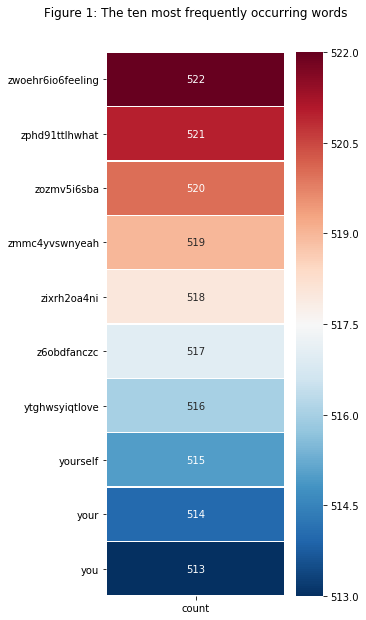

In [7]:
import seaborn as sns
sns.set_context({"figure.figsize":(4,10)})
sns.heatmap(data=df, cmap="RdBu_r", annot=True,fmt="d",linewidths=0.3).set(title = "Figure 1: The ten most frequently occurring words\n\n")

In [8]:
pd.set_option('display.max_colwidth', -1)
pd.reset_option('display.max_colwidth')
pd.options.display.max_colwidth = 1000

import re
import functools
import operator

from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import wordnet
import nltk
import emoji

In [9]:
def tokenize_with_emoji(tweet):
    em_split_emoji = emoji.get_emoji_regexp().split(tweet)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    return em_split

def get_wordnet_pos(word):
    # Map POS tag to first character lemmatize()
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

punctuation = punctuation + "…" + "‼"
stopwords_list = set(stopwords.words('english') + ["follow"])
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def clean_step1(tweet):
    tweet = re.sub(r'^RT\b', '', tweet) # remove RT at the begininig of sentense
    tweet = re.sub(r'(?:&[\w_]+;)', '', tweet) # remove &amp;
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs 
    tweet = re.sub(r'(?:#[\w_]+)', '', tweet)# remove hashtag
    tweet = re.sub(r'<.*?>', '', tweet) # remove HTML
    tweet = re.sub(r'(?:@[\w_]+)', '', tweet) # remove @-mentions 
    return tweet

def clean_step2(tweet):
    tweet = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', '', tweet) # remove numbers
    tweet = emoji.demojize(tweet)
    tweet = tweet.encode("ascii", errors="ignore").decode() # remove non-English words
    word_list = tokenize_with_emoji(tweet)
    word_list = [word for word in word_list if word not in stopwords_list] #remove stopwords
    tweet = " ".join(word_list)
    tweet = emoji.emojize(tweet)
    return tweet

def clean_step3(tweet):
    word_list = tokenize_with_emoji(tweet)
    word_list = [porter.stem(word) for word in word_list] #stemming
    word_list = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list] #lemmatizer
    word_list = [word for word in word_list if len(word) > 1] #remove single-char words
    tweet = " ".join(word_list)
    tweet = emoji.emojize(tweet)
    pattern = r"[{}]".format(punctuation) # create the punctuations pattern
    tweet = re.sub(pattern, "", tweet) 
    return tweet
  
    
processed_tweets=[]
list_tweets = []
    
for tweet in tweets:
    result = clean_step1(tweet)
    if result == "":
        continue
    list_tweets.append(result)
    processed_tweets.append({"text":result})
    
tweets = list_tweets
    


/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:

[Text(0.5, 1, 'Figure 2: The ten most frequently occurring words after step one\n')]

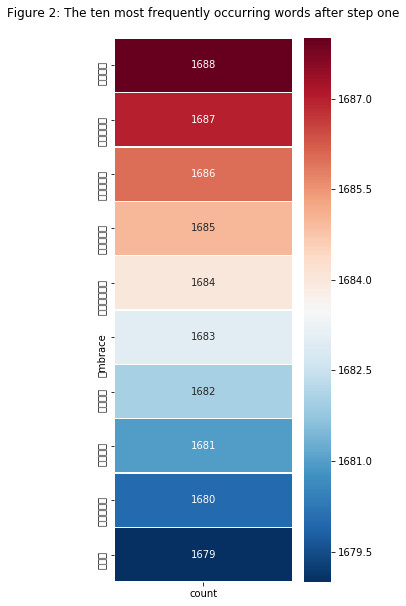

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

limit = 1000
cv = CountVectorizer(list_tweets[:limit])
count_vector=cv.fit_transform(list_tweets[:limit])
count_vector.shape
dic = cv.vocabulary_
df = pd.DataFrame.from_dict(dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[:10]


sns.set_context({"figure.figsize":(4,10)})
sns.heatmap(data=df, cmap="RdBu_r", annot=True,fmt="d",linewidths=0.3).set(title = "Figure 2: The ten most frequently occurring words after step one\n")

In [11]:
def isint(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False


In [12]:
stop_dic = {}
for i in dic:
    if i in stopwords_list:
        stop_dic[i] = dic[i]

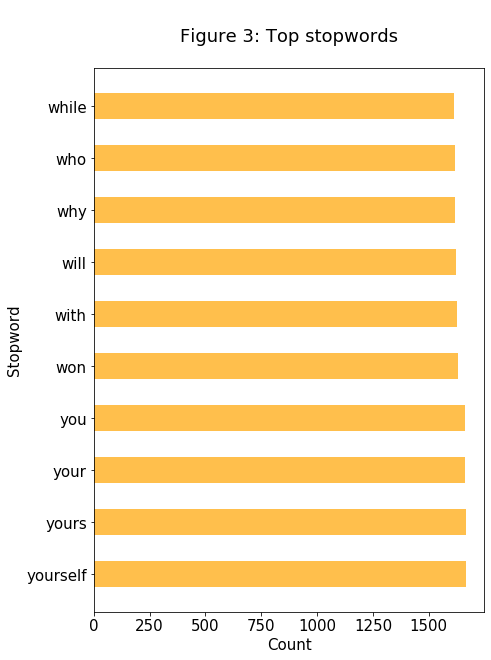

In [13]:
df = pd.DataFrame.from_dict(stop_dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[:10]

plt.figure(figsize=(7,10))
plt.rcParams["font.size"] = "15"
#bar graph
plt.barh(df.index,df['count'], alpha=0.7,color='orange', height = 0.5)
#x-axis labels 
plt.xlabel('Count') 
#y-axis labels 
plt.ylabel('Stopword') 
#plot title 
plt.title('\nFigure 3: Top stopwords\n') 
plt.show()

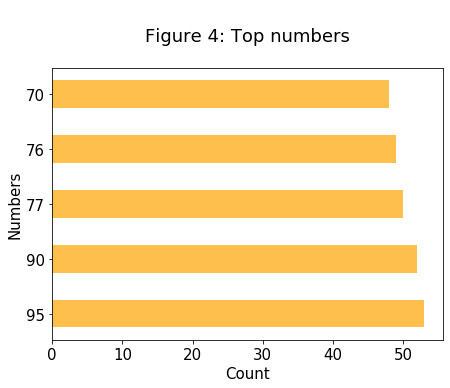

In [14]:
num_dic = {}
for i in dic:
    if isint(i):
        num_dic[i] = dic[i]

df = pd.DataFrame.from_dict(num_dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[:5]

plt.figure(figsize=(7,5))
plt.rcParams["font.size"] = "15"
#bar graph
plt.barh(df.index,df['count'], alpha=0.7,color='orange', height = 0.5)
#x-axis labels 
plt.xlabel('Count') 
#y-axis labels 
plt.ylabel('Numbers') 
#plot title 
plt.title('\nFigure 4: Top numbers\n') 
plt.show()
        

In [15]:
processed_tweets=[]
list_tweets = []
    
for tweet in tweets:
    result = clean_step2(tweet)
    if result == "":
        continue
    list_tweets.append(result)
    processed_tweets.append({"text":result})
    
tweets = list_tweets

[Text(0.5, 1, 'Figure 5: Most frequently occurring words after step two\n')]

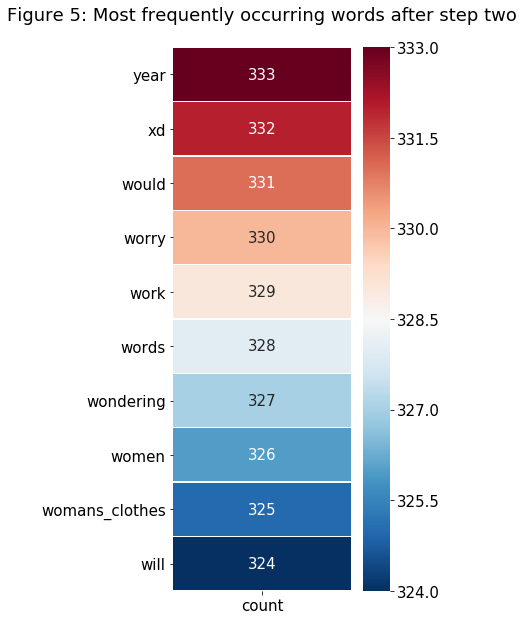

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

limit = 100
cv = CountVectorizer(list_tweets[:limit])
count_vector=cv.fit_transform(list_tweets[:limit])
count_vector.shape
dic = cv.vocabulary_
df = pd.DataFrame.from_dict(dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[5:15]


sns.set_context({"figure.figsize":(4,10)})
sns.heatmap(data=df, cmap="RdBu_r", annot=True,fmt="d",linewidths=0.3).set(title = "Figure 5: Most frequently occurring words after step two\n")

In [17]:
processed_tweets=[]
list_tweets = []
    
for tweet in tweets:
    result = clean_step3(tweet)
    if result == "":
        continue
    list_tweets.append(result)
    processed_tweets.append({"text":result})
    
    
processed_tweets

cleaned_df = pd.DataFrame.from_dict(processed_tweets)

[Text(0.5, 1, 'Figure 6: Most frequently occurring words after step three\n')]

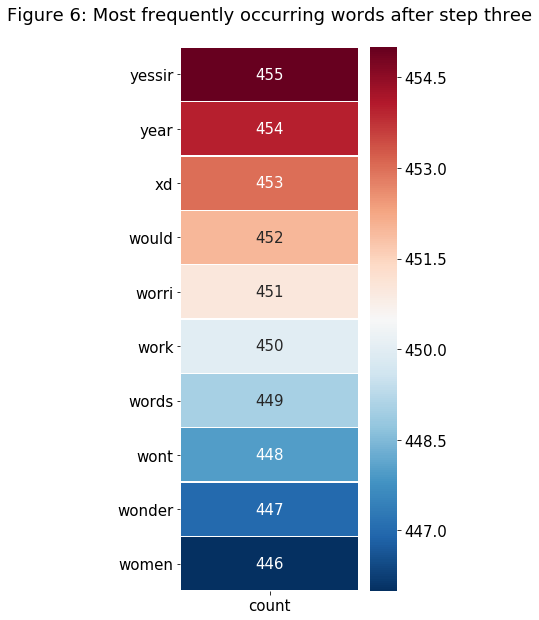

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

limit = 100
cv = CountVectorizer(list_tweets[:limit])
count_vector=cv.fit_transform(list_tweets[:limit])
count_vector.shape
dic = cv.vocabulary_
df = pd.DataFrame.from_dict(dic, orient='index', columns= ["count"]).sort_values(by=['count'], ascending=False)[5:15]


sns.set_context({"figure.figsize":(4,10)})
sns.heatmap(data=df, cmap="RdBu_r", annot=True,fmt="d",linewidths=0.3).set(title = "Figure 6: Most frequently occurring words after step three\n")

In [23]:
out_csv = []
for t in list_tweets:
    out_csv.append(t.split())
    
import csv

with open("TweetResults.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(out_csv)

In [52]:
pd.DataFrame(dic,index=[0])

,beauti,morn,worri,happy,friends,happen,now,first,dad,bring,...,done,wolfi,sound,relat,huskys,stay,motivated,keep,take,step
0,20,249,431,171,143,169,263,133,75,39,...,93,424,349,312,184,356,251,198,372,357


In [53]:
text = " ".join(list_tweets)
# get each vocab with count
words = tokenize_with_emoji(text)
words[:20]

['beauti',
 '✨',
 '👇',
 '🥰',
 '👇',
 '🌹',
 '👇',
 '🙏',
 '👇',
 '💐',
 '👇',
 '🤩',
 '👇',
 '⬅',
 '✨',
 '⬅',
 '✨',
 '⬅',
 '✨',
 'morn']

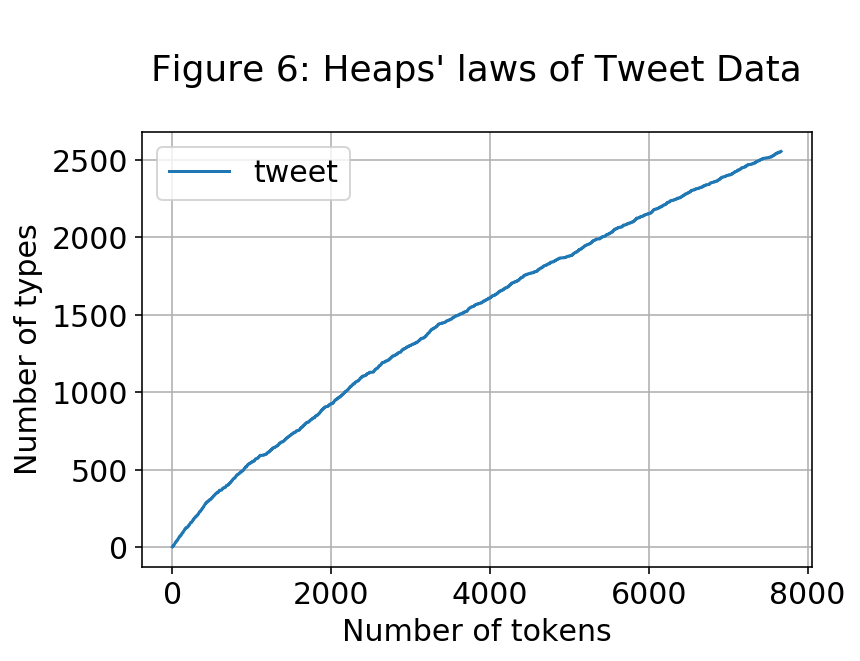

In [54]:
# Plot a token log frequency. Describe what this plot means and how to interpret it. 

def separate_tokens_types(words):
    
    #Separate the counts of tokens and types 
    t_d = {}
    tokens, types = [], []
    count = 0
    for i in range(len(words)):
        if words[i] not in t_d:
            count += 1
            t_d[words[i]] = 1
        tokens.append(i + 1)
        types.append(count)
    return tokens, types

t_tokens, t_types = separate_tokens_types(words)

# Plot the Heaps' curves
plt.plot(t_tokens, t_types, label='tweet')
plt.grid()
plt.legend()
plt.title("\nFigure 6: Heaps' laws of Tweet Data\n")
plt.xlabel('Number of tokens')
plt.ylabel('Number of types')
plt.show()

In [55]:
import collections
# get unqiue words and its count in the text 
# get each vocab with count
words = tokenize_with_emoji(text)
c = collections.Counter(words)
tokens = pd.DataFrame(c.most_common(10), columns = ['token', 'count'])
tokens

,token,count
0,❤,145
1,love,73
2,😍,66
3,✨,57
4,👉,56
5,get,54
6,check,53
7,out,46
8,🔥,45
9,👈,45


In [56]:
import emoji
tokens['emoji'] = tokens['token'].apply(lambda x: x in emoji.UNICODE_EMOJI)
emojis = tokens[tokens['emoji']]
words = tokens[~tokens['emoji']]
emojis = emojis.head(20)
words

,token,count,emoji
1,love,73,False
5,get,54,False
6,check,53,False
7,out,46,False


/Users/zihe/Desktop/2020_Summer/503/Ass3


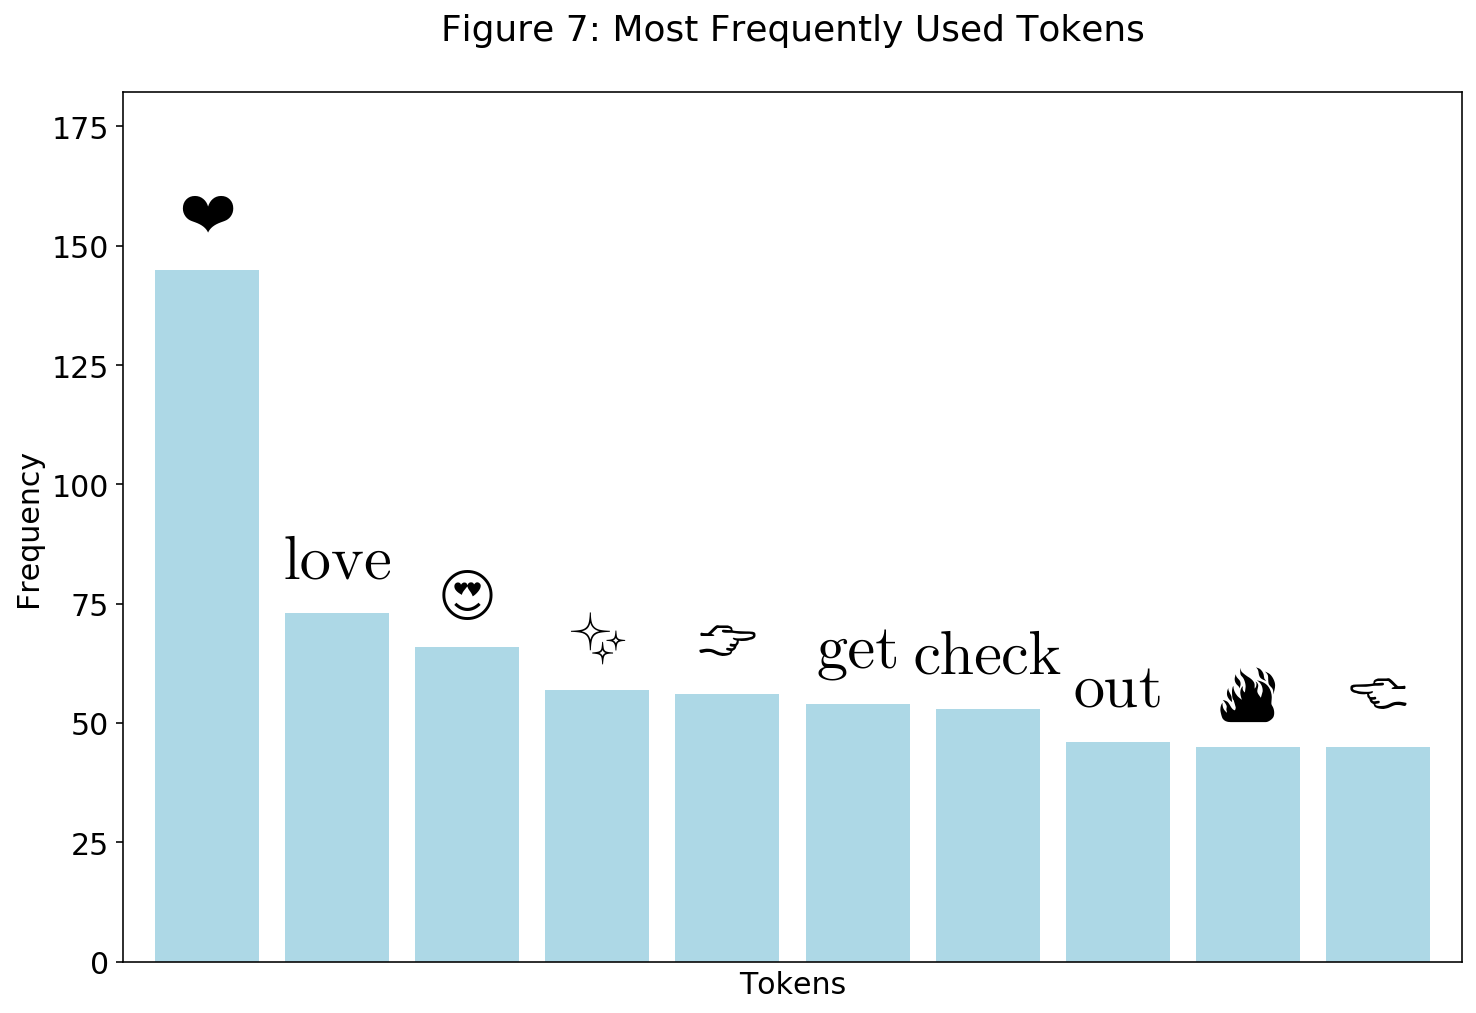

In [57]:
from matplotlib.font_manager import FontProperties
import ipykernel.pylab.backend_inline
import mplcairo.base
ipykernel.pylab.backend_inline.new_figure_manager = \
    mplcairo.base.new_figure_manager
from os import path
import os


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
print(d)

# Generate a word cloud image
# The Symbola font includes most emoji
# Apple Color Emoji.ttf
font_path = path.join(d, 'Symbola.ttf')


# /System/Library/Fonts/Apple Color Emoji.ttc
# Load Apple Color Emoji font 
prop = FontProperties(fname=font_path)

plt.figure(figsize=(12, 8))
ax = tokens['count'].plot(kind='bar', color='lightblue', width=0.8)
ax.set_title('Figure 7: Most Frequently Used Tokens\n')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Tokens', fontsize=15)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, tokens['token']):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop
    )

plt.show()


/Users/zihe/Desktop/2020_Summer/503/Ass3


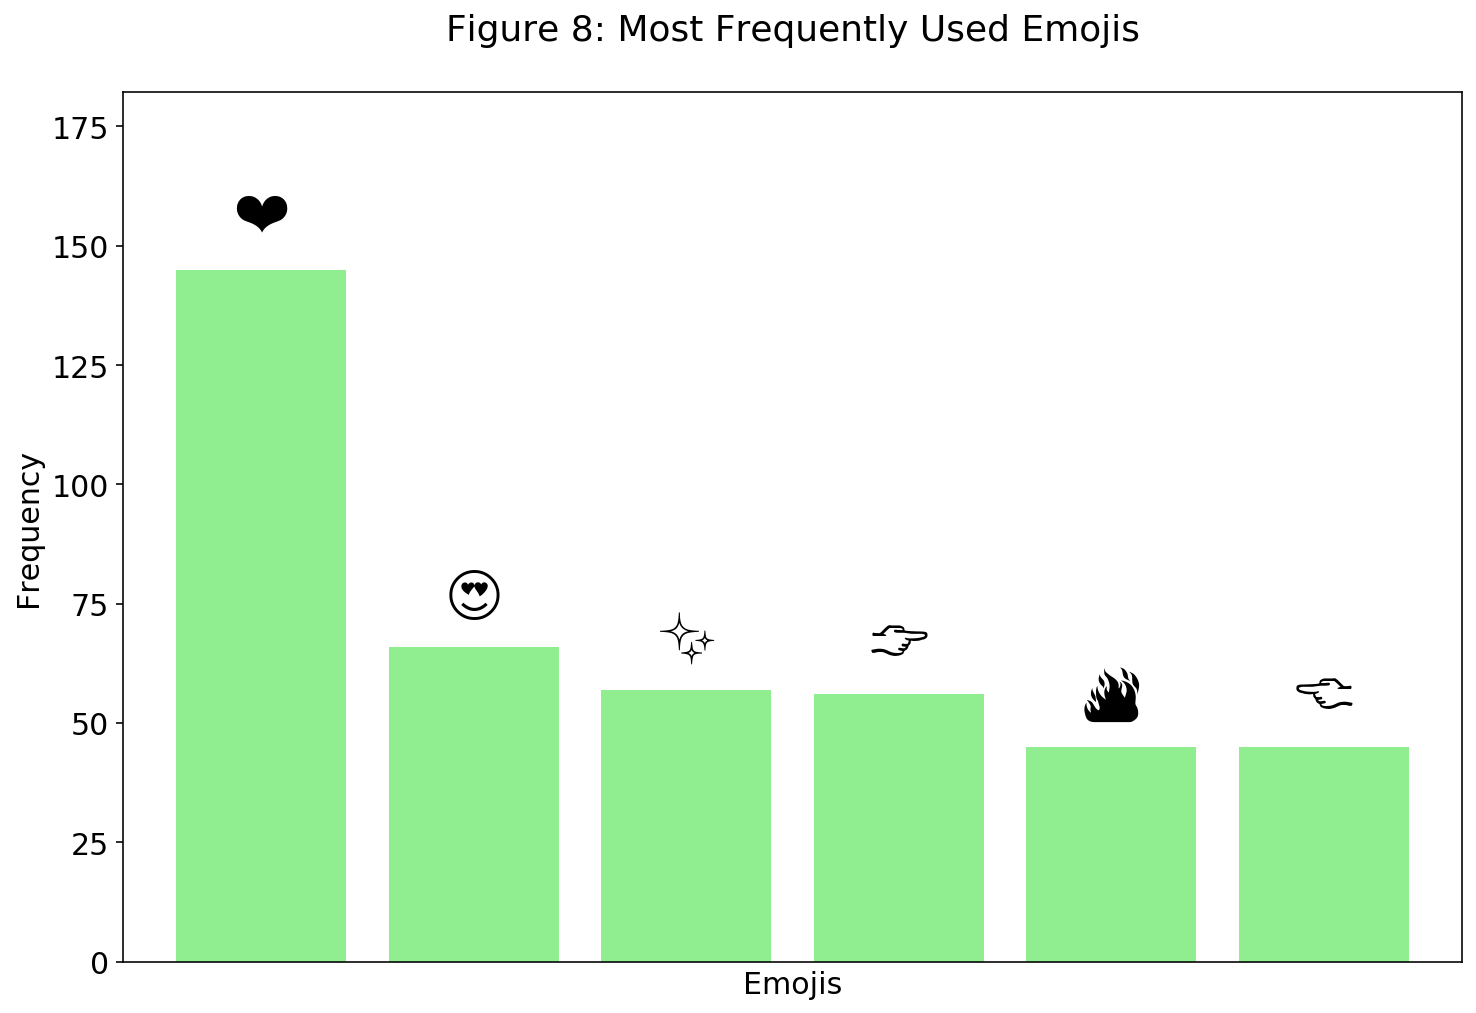

In [58]:
from matplotlib.font_manager import FontProperties
import ipykernel.pylab.backend_inline
import mplcairo.base
ipykernel.pylab.backend_inline.new_figure_manager = \
    mplcairo.base.new_figure_manager
from os import path
import os


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
print(d)

# Generate a word cloud image
# The Symbola font includes most emoji
# Apple Color Emoji.ttf
font_path = path.join(d, 'Symbola.ttf')


# /System/Library/Fonts/Apple Color Emoji.ttc
# Load Apple Color Emoji font 
prop = FontProperties(fname=font_path)

plt.figure(figsize=(12, 8))
ax = emojis['count'].plot(kind='bar', color='lightgreen', width=0.8)
ax.set_title('Figure 8: Most Frequently Used Emojis\n')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, emojis['token']):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop
    )

plt.show()


In [59]:
from wordcloud import WordCloud
from os import path
import os

def get_wordcloud(my_dev_text, name):
    # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    print(d)

    # Generate a word cloud image
    # The Symbola font includes most emoji
    font_path = path.join(d, 'Symbola.ttf')
    wordcloud = WordCloud(font_path=font_path, background_color="white", collocations = False).generate(my_dev_text)

    # Display the generated image:
    fig = plt.figure(figsize = (12, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.tight_layout(pad = 0) 
    plt.axis("off")
    plt.show()
   # fig.savefig(name)

/Users/zihe/Desktop/2020_Summer/503/Ass3


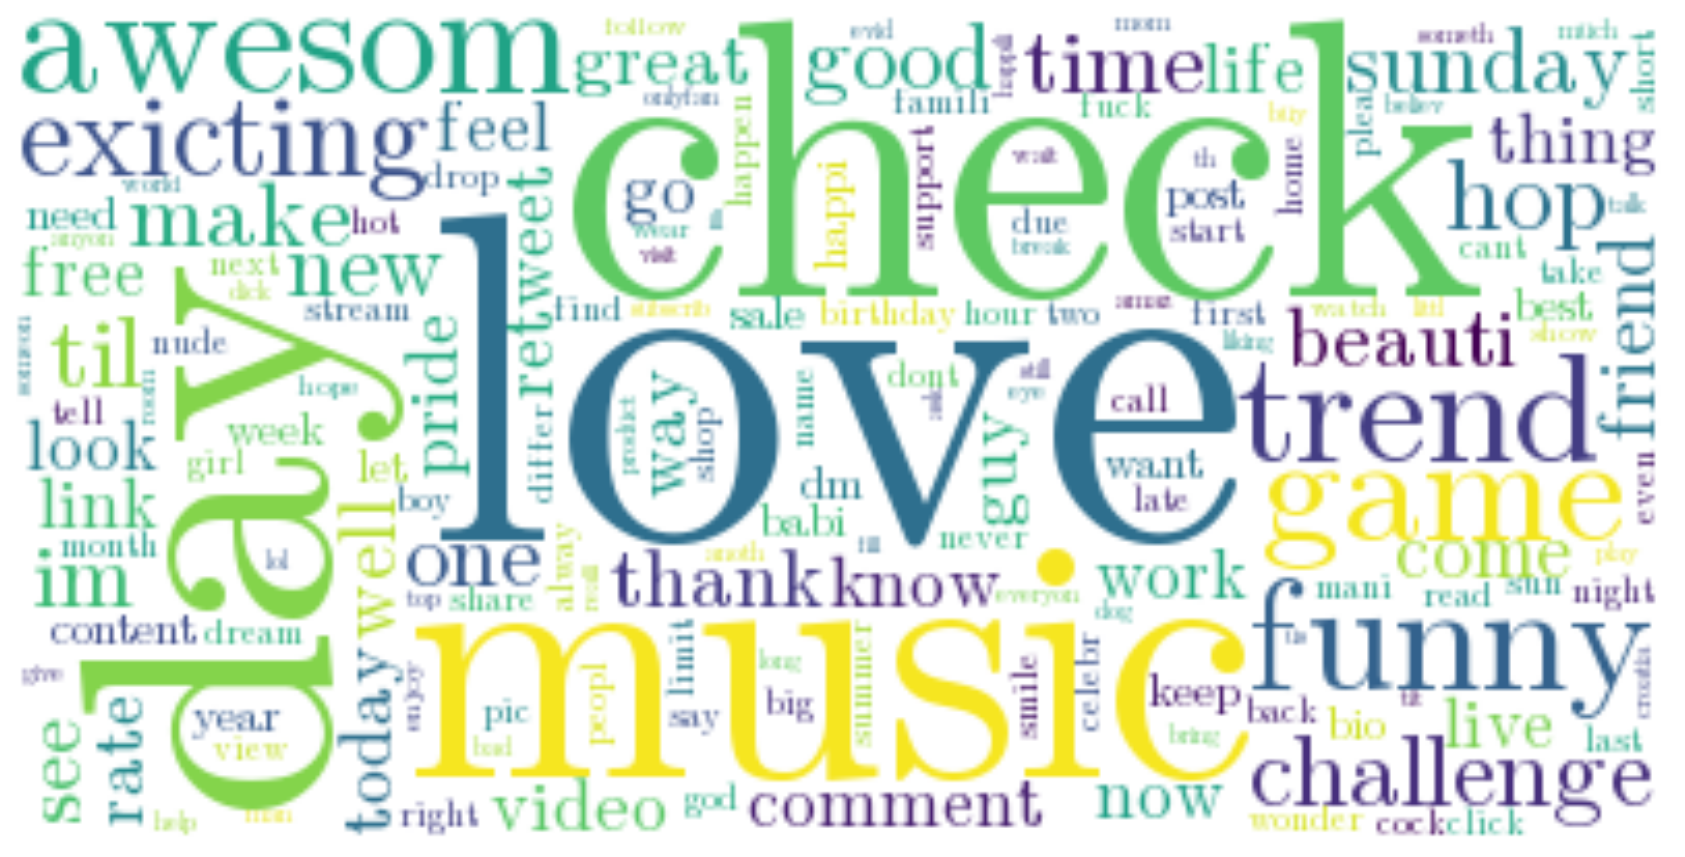

In [60]:
get_wordcloud(text, "word_cloud_total.png")

# Modeling

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 3000)
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import datetime

analyzer = SentimentIntensityAnalyzer()


def score(tags):
    text = " ".join(tags.split("|"))
    text_split = ' '.join(re.findall(r'[A-Z]?[^A-Z\s]+|[A-Z]+', text))
    scores = analyzer.polarity_scores(text_split)
    return scores['compound']

def label(row):
    if row['score'] > 0.3:
        return "POSITIVE"
    if row['score'] < -0.3:
        return "NEGATIVE"
    return "NEUTRAL"

def main(df):
    to_file = "labeled_tweets.csv"
    df['score'] = df['text'].apply(lambda x: score(x))
    df['label'] = df.apply(label, axis=1)
    df.to_csv(to_file, index = False)
    print(df.groupby("label").size())
    return df

In [14]:
labeled_df = main(cleaned_df)

label
NEGATIVE    39 
NEUTRAL     534
POSITIVE    265
dtype: int64


In [16]:
labeled_df.head()

,text,score,label
0,beauti ✨,0.0000,NEUTRAL
1,👇🥰👇🌹👇🙏👇💐👇🤩👇,0.0000,NEUTRAL
2,⬅✨,0.0000,NEUTRAL
3,⬅✨,0.0000,NEUTRAL
4,⬅✨ morn ❣ worri happy 👧🏼,0.5719,POSITIVE


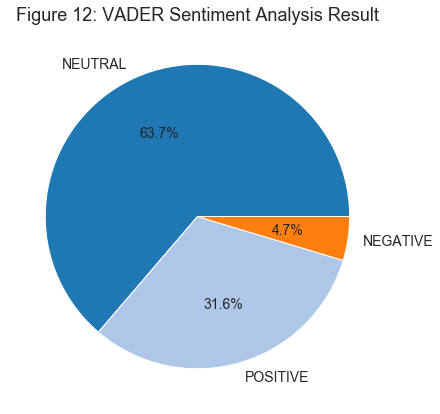

In [20]:
ratings = labeled_df['label'].value_counts()
indexes = list(ratings.index)

labels, sizes = [], []
for i in indexes:
    label = i
    labels.append(label)
    sizes.append(ratings[i])
    

plt.figure(figsize=(7,7))
with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}): 
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
    plt.title("Figure 12: VADER Sentiment Analysis Result")
    #plt.tight_layout()
    
    plt.show()

In [18]:
import pandas as pd
labeled_df = pd.read_csv("labeled_tweets.csv")
labeled_df.head()

,text,score,label
0,beauti ✨,0.0000,NEUTRAL
1,👇🥰👇🌹👇🙏👇💐👇🤩👇,0.0000,NEUTRAL
2,⬅✨,0.0000,NEUTRAL
3,⬅✨,0.0000,NEUTRAL
4,⬅✨ morn ❣ worri happy 👧🏼,0.5719,POSITIVE


[Text(0, 0.5, 'score'),
 Text(0.5, 0, 'label'),
 Text(0.5, 1.0, 'Figure 13: Distribution between scores and results')]

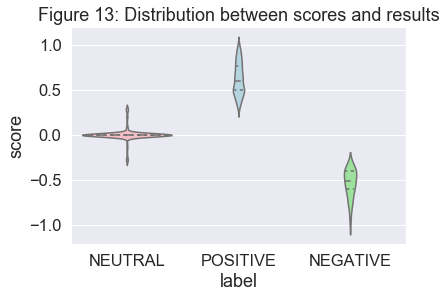

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette('Set2')
import numpy as np
import pandas as pd
sns.set(font_scale=1.5)

sns.violinplot("label", "score", data=labeled_df, 
               split=True, inner="quartile", 
               palette=["lightpink", "lightblue", "lightgreen"]
              ).set(title = 'Figure 13: Distribution between scores and results', 
                xlabel = 'label', ylabel = 'score') 

In [26]:
neg = labeled_df[labeled_df['label'] == "NEGATIVE"]

neg_text = " ".join(list(neg['text']))

neg_text

'➡ im weak shit get cri so tho 👍 lil bro 💯 congratshi babi 💓😝 die hair blue post fans hour late night phone call guy besti ✨ make tell problem easi bet downfal paulin hanson gener fault new arnott shape rawr hear ➡ like➡ comment ➖➖➖➖ earli birthday celebr besties❣ get find this im retir mother rel reside sad e 📸 😇 😍 😎👍 🙏🏻 👏❤💛💜🧡💚💙🖤💓💗💖💘💝💞💕         break wont break bond brother ✊🏼 damn ur funnycraziest shit ive read twitter todayrefriger breaks holi fuck 🤣🤣veilfal ✍adron day lil shop morn beauti mommi 😘❤🙏🏾beauti dakotakuhn wear popular poppi red❤ contacts contact avail prescript kill viru right ➖➖➖➖ reason agre watch mad max❤🤪🥰😍🤩 wolfi sound 🐺 relat huskys😊🥰😃new video stay motivated💪keep fight 🥊 steve get well truli fuck 👍😂🦌modest performanceact wear available onlin platform come soon 💖✨ get mad like he mad 😉🤣 littl sluggish  snail one 🤣🤪 sleep night much suffer world 💔 harm 😠 weaken liver 😥 weaken lung shoutout sheinoffici killer tig right dm snapchat 😚best bad none 💕 get freaki free fuc

/Users/zihe/Desktop/2020_Summer/503/Ass3


/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129000 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zihe/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129392 missing from current font.
  font.load_char(ord(s), flags=flags)


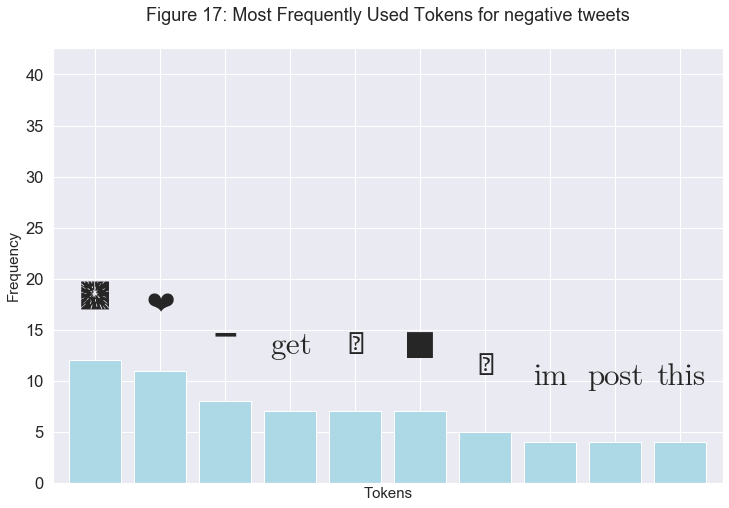

In [127]:
import collections
# get unqiue words and its count in the text 
# get each vocab with count
words = tokenize_with_emoji(neg_text)
c = collections.Counter(words)
tokens = pd.DataFrame(c.most_common(10), columns = ['token', 'count'])
tokens

from matplotlib.font_manager import FontProperties
import ipykernel.pylab.backend_inline
import mplcairo.base
ipykernel.pylab.backend_inline.new_figure_manager = \
    mplcairo.base.new_figure_manager
from os import path
import os


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
print(d)

# Generate a word cloud image
# The Symbola font includes most emoji
# Apple Color Emoji.ttf
font_path = path.join(d, 'Symbola.ttf')


# /System/Library/Fonts/Apple Color Emoji.ttc
# Load Apple Color Emoji font 
prop = FontProperties(fname=font_path)

plt.figure(figsize=(12, 8))
ax = tokens['count'].plot(kind='bar', color='lightblue', width=0.8)
ax.set_title('Figure 17: Most Frequently Used Tokens for negative tweets\n')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Tokens', fontsize=15)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, tokens['token']):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop
    )

plt.show()

In [28]:
pos = labeled_df[labeled_df['label'] == "POSITIVE"]

pos_text = " ".join(list(pos['text']))

f = open("postive.txt", "a")
f.write(pos_text)
f.close()

/Users/zihe/Desktop/2020_Summer/503/Ass3


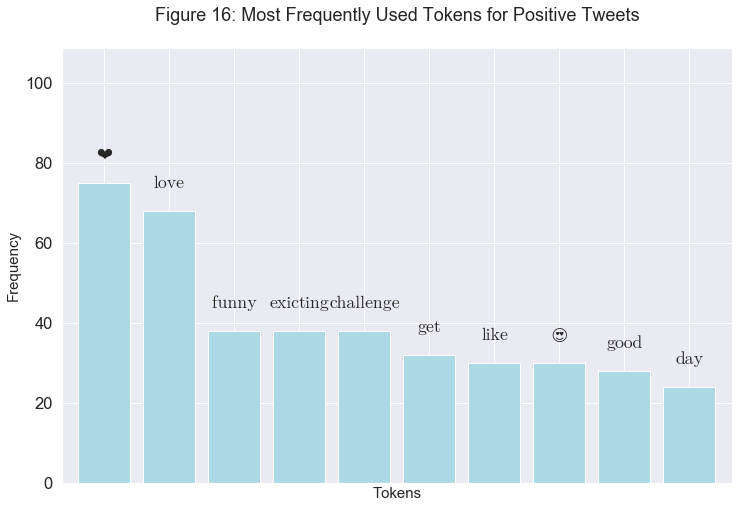

In [126]:
import collections
# get unqiue words and its count in the text 
# get each vocab with count
words = tokenize_with_emoji(pos_text)
c = collections.Counter(words)
tokens = pd.DataFrame(c.most_common(10), columns = ['token', 'count'])
tokens

from matplotlib.font_manager import FontProperties
import ipykernel.pylab.backend_inline
import mplcairo.base
ipykernel.pylab.backend_inline.new_figure_manager = \
    mplcairo.base.new_figure_manager
from os import path
import os


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
print(d)

# Generate a word cloud image
# The Symbola font includes most emoji
# Apple Color Emoji.ttf
font_path = path.join(d, 'Symbola.ttf')


# /System/Library/Fonts/Apple Color Emoji.ttc
# Load Apple Color Emoji font 
prop = FontProperties(fname=font_path)

plt.figure(figsize=(12, 8))
ax = tokens['count'].plot(kind='bar', color='lightblue', width=0.8)
ax.set_title('Figure 16: Most Frequently Used Tokens for Positive Tweets\n')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Tokens', fontsize=15)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, tokens['token']):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=17,
        fontproperties=prop
    )

plt.show()